<a href="https://colab.research.google.com/github/Aduomas/PP10/blob/main/Practical_Project_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

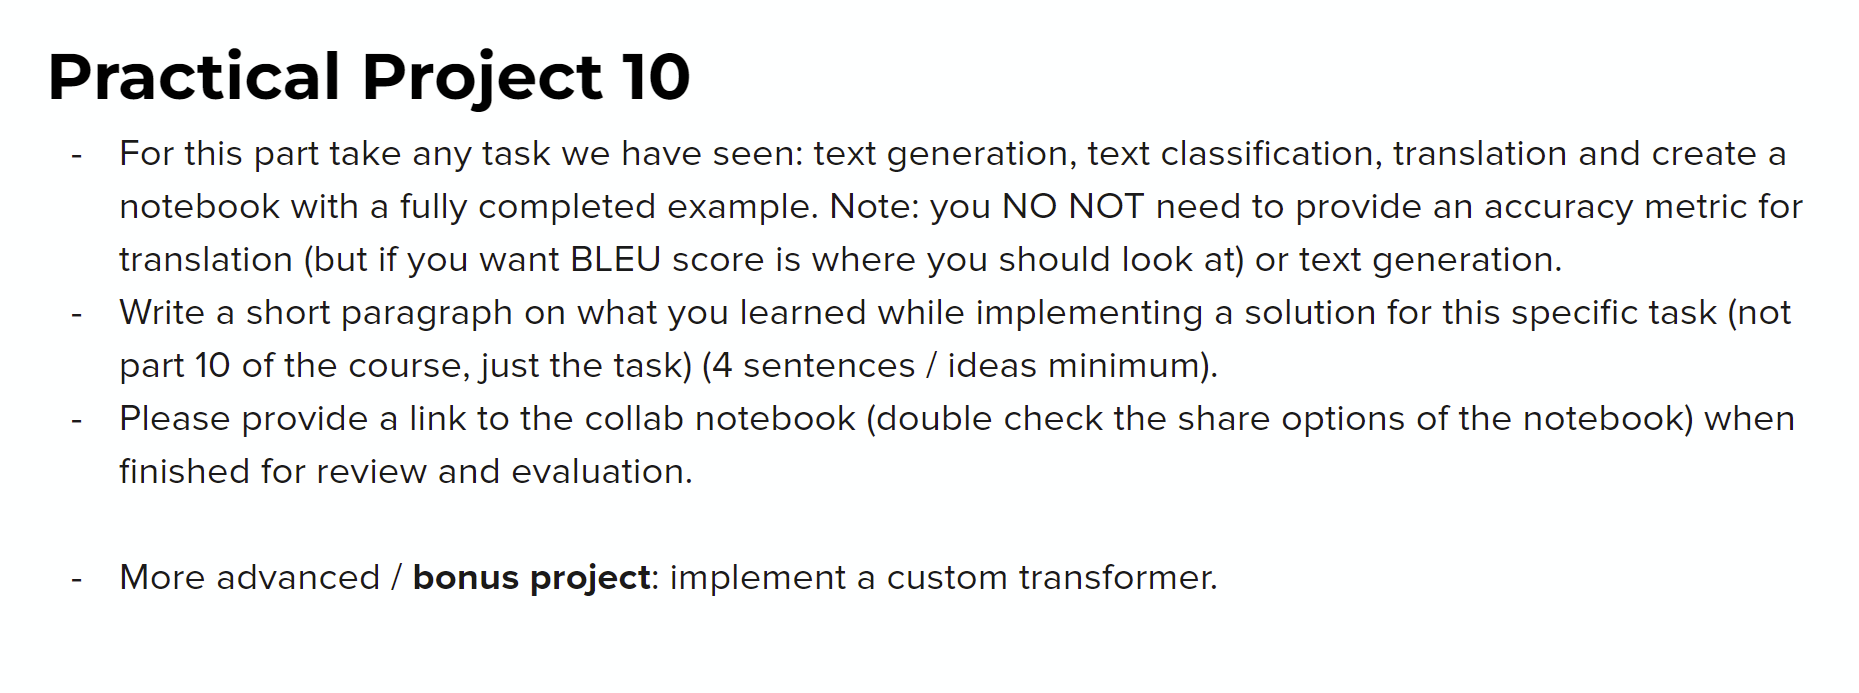

## Installing transformers and loading up BERT Sequence Classification model

In [1]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.5 MB/s 
     |████████████████████████████████| 3.3 MB 33.6 MB/s 
     |████████████████████████████████| 895 kB 32.5 MB/s 
     |████████████████████████████████| 67 kB 3.3 MB/s 
     |████████████████████████████████| 596 kB 34.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [3]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


## Downloading data (IMDB Dataset)

In [4]:
import tensorflow as tf
import pandas as pd

URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
                                  origin=URL,
                                  untar=True,
                                  cache_dir='.',
                                  cache_subdir='')

84140032/84125825 [==============================] - 3s 0us/step


In [5]:
import os
import shutil

main_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
train_dir = os.path.join(main_dir, 'train')
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)
print(os.listdir(train_dir))

['urls_neg.txt', 'pos', 'labeledBow.feat', 'urls_unsup.txt', 'unsupBow.feat', 'neg', 'urls_pos.txt']


## Train/Test split

In [6]:
train = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='training', seed=123)
test = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='validation', seed=123)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [7]:
for i in train.take(1):
  train_feat = i[0].numpy()
  train_lab = i[1].numpy()

train = pd.DataFrame([train_feat, train_lab]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,Canadian director Vincenzo Natali took the art...,1
1,I gave this film 10 not because it is a superb...,1
2,I admit to being somewhat jaded about the movi...,1
3,"For a long time, 'The Menagerie' was my favori...",1
4,A truly frightening film. Feels as if it were ...,0


In [8]:
for j in test.take(1):
  test_feat = j[0].numpy()
  test_lab = j[1].numpy()

test = pd.DataFrame([test_feat, test_lab]).T
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
test.head()

,DATA_COLUMN,LABEL_COLUMN
0,I can't believe that so much talent can be was...,0
1,This movie blows - let's get that straight rig...,0
2,"The saddest thing about this ""tribute"" is that...",0
3,I'm only rating this film as a 3 out of pity b...,0
4,Something surprised me about this movie - it w...,1


In [9]:
train.iloc[1]['DATA_COLUMN']

"I gave this film 10 not because it is a superbly consistent movie, but for it's pure ability to evoke emotions in its audience. The story of one-woman's-struggle-against-all-odds is an old cliché by now, but very few films have carried it off with so much warmth and sincerity as The Color Purple.<br /><br />It also showed a different side to the African-American experience - showing that after slaves were granted freedom many fell into the ways of the hated 'white man' and were abusive of their own people. I find this an important point as it goes against the portray-white-on-black-violence-and-win-an-Oscar trend.<br /><br />Also the acting performances are superb - especially Oprah who I now have a new found respect for.<br /><br />Well worth watching - but keep some tissue handy."

In [41]:
test.iloc[1]['DATA_COLUMN']

'This movie blows - let\'s get that straight right now. There are a few scene gems nestled inside this pile of crap but none can redeem the limp plot. Colin Farrel looks like Brad Pitt in "12 Monkeys" and acts in a similar manner. I normally hate Colin because he is a fairy in general but he\'s OK in this movie. There were two plot lines in this movie-= one about a kid who throws rocks through windshields of moving vehicles and the other about a woman with a moustache. Let\'s face it- this movie has no freaking idea of what it wanted to say or where it wanted to go. THe characters story lines intertwine on some levels but are in no means worthy of being included in a script. The whole thing is weak and pointless and then there is an occasional OK scene. But overall- Don\'t bother unless you love irish accents so much that you can watch mediocrity and it is rescued by everyone sounding like the Lucky Charms elf -an American fetish that has catapulted some truly crappy movies to success.

In [10]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, text_a = x[DATA_COLUMN], text_b = None, label = x[LABEL_COLUMN]), axis = 1)
  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, text_a = x[DATA_COLUMN], text_b = None, label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [11]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Training

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=1, validation_data=validation_data)

1250/1250 [==============================] - 2072s 2s/step - loss: 0.2686 - accuracy: 0.8850 - val_loss: 0.3415 - val_accuracy: 0.8830


## Save the model

In [13]:
model.save_weights('model_weights', save_format='tf')

## Downloading weights and loading up a model.

In [36]:
!gdown --id 1oelRnAixYd0ol3C1zupmmIAOEqANPud0

Downloading...
From: https://drive.google.com/uc?id=1oelRnAixYd0ol3C1zupmmIAOEqANPud0
To: /content/model_weights.data-00000-of-00001
100% 1.31G/1.31G [00:17<00:00, 75.8MB/s]


In [37]:
!gdown --id 1fFwX6ISCZhXjyFxjei-RVYnlJ6LxBw5Y

Downloading...
From: https://drive.google.com/uc?id=1fFwX6ISCZhXjyFxjei-RVYnlJ6LxBw5Y
To: /content/model_weights.index
100% 44.1k/44.1k [00:00<00:00, 41.1MB/s]


In [38]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

load_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

load_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])
load_model.load_weights('model_weights')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Predicting based on sentences.

In [39]:
pred_sentences = ['This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good',
                  'One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie',
                  'It was interesting at first, main character was beautiful until it got bored and I couldn\'t watch it no more']

In [42]:
def predict(sequences):
  tf_batch = tokenizer(sequences, max_length=128, padding=True, truncation=True, return_tensors='tf')
  tf_outputs = load_model(tf_batch)
  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
  labels = ['Negative','Positive']
  label = tf.argmax(tf_predictions, axis=1)
  label = label.numpy()
  for i in range(len(sequences)):
    print(sequences[i], ": \n", labels[label[i]])

In [43]:
predict(pred_sentences)

This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good : 
 Positive
One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie : 
 Negative
It was interesting at first, main character was beautiful until it got bored and I couldn't watch it no more : 
 Negative


In [44]:
predict(['hey how are you doing'])

hey how are you doing : 
 Positive


In [45]:
predict(['lets talk later'])

lets talk later : 
 Negative


## Predicting sentiment analysis problem of news using api

### https://newsdata.io/

In [ ]:
api_key = 'pub_4061d3b8d6397e4057f769ca86556ad262cf' # gg
topic = 'stock market'

import requests

req = requests.get(f'https://newsdata.io/api/1/news?apikey={api_key}&q={topic}')
req

In [ ]:
req.json()

In [ ]:
contents = [res['content'] for res in req.json()['results'] if res['content']]
contents

In [60]:
predict(contents)

If you were lucky enough to avoid any investment losses in a bullish 2021, then 2022 has changed your luck. The S&P 500 (SNPINDEX: ^GSPC) is now down more than 9% year-to-date, a move that played out without any warning. And it may well be moving even lower before all is said and done. It's an uncomfortable outcome for veteran investors, while newcomers to the market may be feeling a mix of horror and shellshock.If that's mentally where you are at this point, don't sweat it. Market corrections and the occasional soured trade are nothing unusual, and certainly no reason to give up on investing. However, this may be the right time to suggest changing your tack. Exchange-traded funds (or ETFs) can help curb some of the volatility inherent to owning individual stocks, and these three ETFs in particular can offer even more stability.It's a painfully obvious option, but the Invesco S&P 500 Low Volatility ETF (NYSEMKT: SPLV) will indeed limit the severity of the swings that might otherwise sh

In [ ]:
topic = 'economy'
req = requests.get(f'https://newsdata.io/api/1/news?apikey={api_key}&q={topic}&page=4')
contents = [res['content'] for res in req.json()['results'] if res['content']]
contents

In [67]:
predict(contents)

As we near the end of the first month of a new year, the stock market is experiencing a lot of turmoil. 2021 was a huge recovery year after the 2020 crash, and the market ended on a high, with the S&P 500 up 26.9%. Those gains have not been repeated -- so far -- in 2022, and the S&P 500 is down about 7% as of midday on Jan. 26.There are a number of reasons for investors to worry. High on the list is the omicron coronavirus variant, which is still wending its way through the world and shutting down many parts of the economy. Another factor is premium valuations on growth stocks, whose prices are falling more in line with their real growth prospects. Their prices are also falling on concerns about the Federal Reserve raising interest rates this year to combat inflation. Higher rates affect growth-focused companies' ability to raise cheap capital to fund their expansion.Image source: The Motley Fool.Continue reading : 
 Positive
It was a dismal year for the British auto industry, with the

In [68]:
topic = 'covid'
req = requests.get(f'https://newsdata.io/api/1/news?apikey={api_key}&q={topic}&page=4')
contents = [res['content'] for res in req.json()['results'] if res['content']]
predict(contents)

The prevalence of Omicron sub-lineage BA.2 is gradually increasing in India, said Sujeet Kumar Singh, Director, National Centre for Disease Control (NCDC), on January 27. Just last week, the UK Health Security Agency flagged the BA.2 sub-variant and designated it as a ‘variant under investigation’. In its latest weekly bulletin, the World Health Organisation noted that a number of countries had reported an increase in the BA.2 sub-variant in the last seven days. Addressing a Health Ministry press briefing in Delhi, Singh said that Omicron sub-variant BA.2 is more prevalent in comparison to the BA.1 variant in India, adding that the BA.3 sub-variant has not been detected in India yet. "Earlier, the BA.1 variant was dominant among the samples collected from the travellers. Now in community settings, we have found that the BA.2 sub-variant is gradually increasing," he said. Talking about increasing cases of Omicron, Singh said that out of the total genome sequencing reports received so fa

### Conclusion

- Once again, I've decided to use transfer learning, and used BERT Classification model for sentimental analysis, It was successful and I once again enjoyed using powerful architectures without a need to build them myself. This came in handy and works pretty well.

-  I've learnt how to save model weights, as this model cannot be saved with a simple .save() method, and also how to load them, I also included this in my github.

- I decided to use an API to get some news and tried sentimental analysis on that content, it works very well from my point of eye.

- Training takes a while and I'm interested in making faster, simpler models in the future, as there isn't much motivation left after running training loop for 20 minutes every time I wish to test something new.